<a href="https://colab.research.google.com/github/MikhailKuklin/Logistic_regression_from_scratch/blob/main/logistic_regression_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install and load necessary modules/libraries**

In [1]:
#pip install category_encoders

In [2]:
#pip install missingno

In [3]:
# load necessary modules

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
import missingno as msno

from sklearn import metrics
from sklearn import datasets
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

**Data preprocessing**

In [4]:
# load csv file

df = pd.read_csv('https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv')

df.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


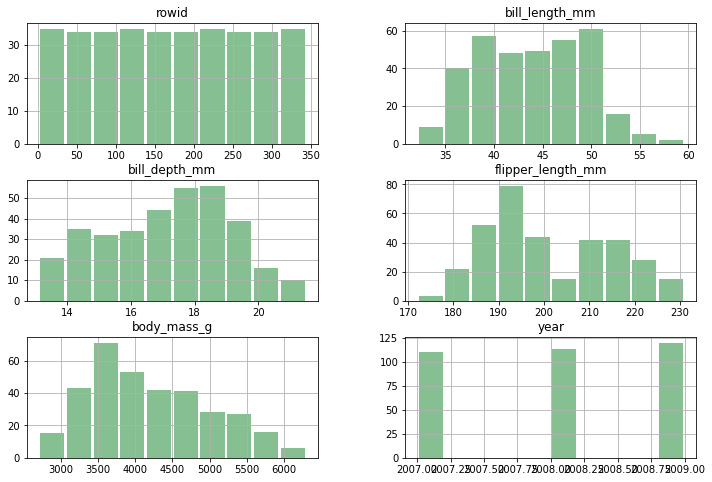

In [5]:
# check histograms

df.hist(bins=10, grid=True, figsize=(12,8), color='#86bf91', zorder=1, rwidth=0.9);

In [6]:
# drop duplicated if exist

df=df.drop_duplicates()

In [7]:
# check null values

df.isnull().sum()

rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

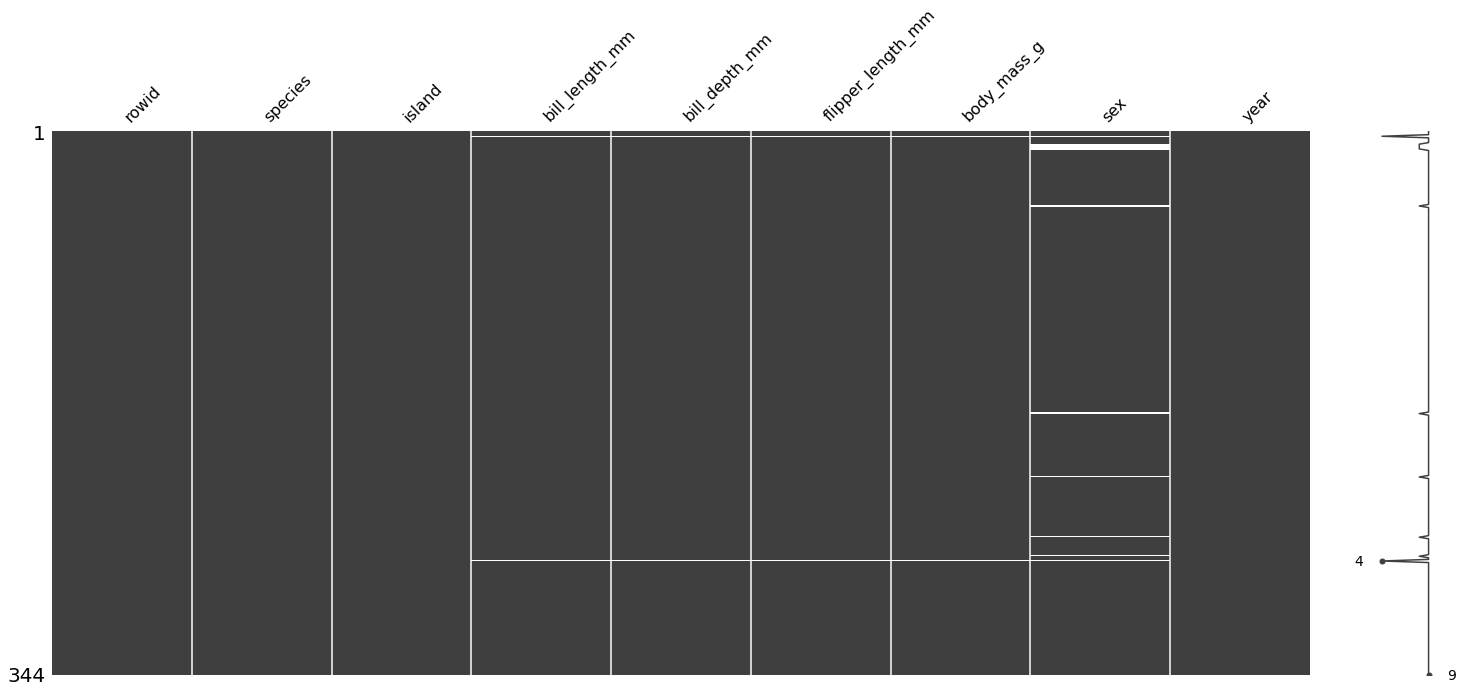

In [8]:
# check missing values

msno.matrix(df);

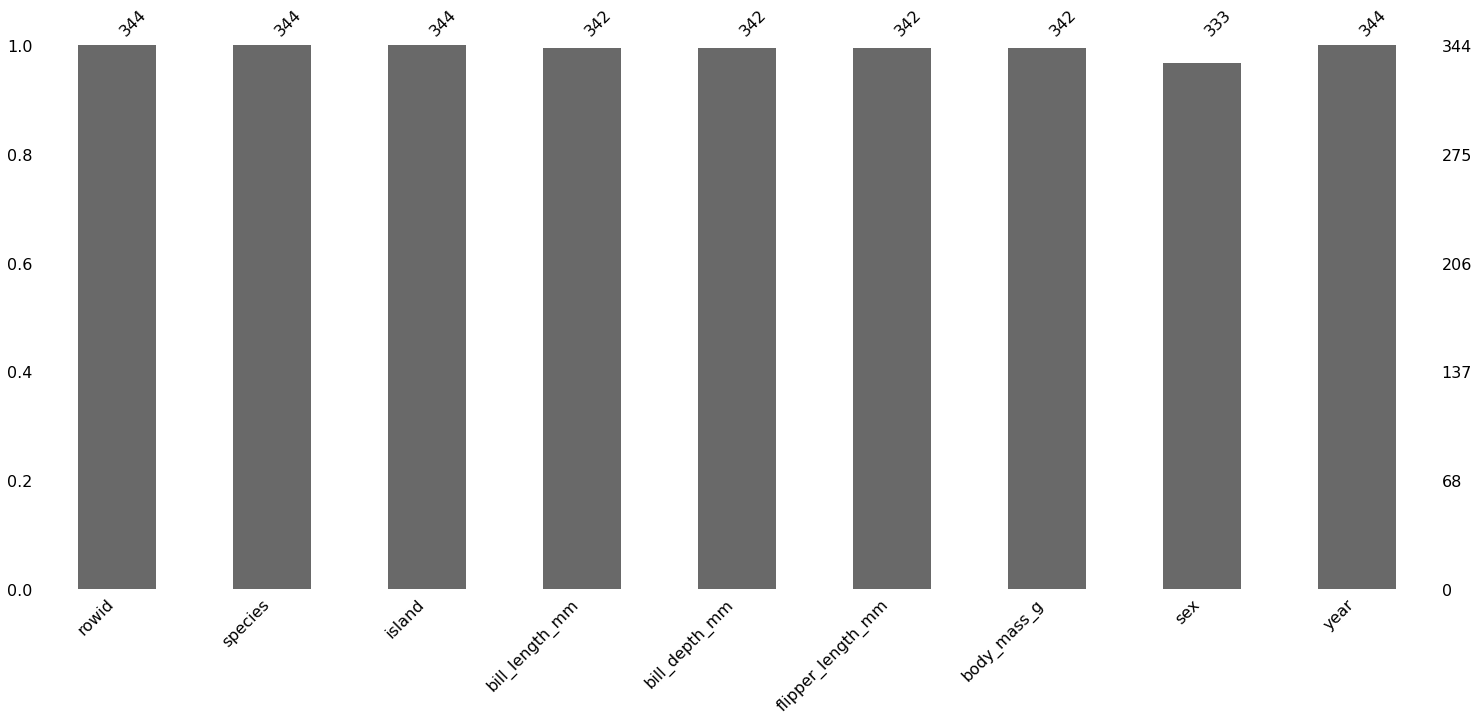

In [9]:
# visualize using bar plot of missing values

msno.bar(df);

In [10]:
# drop columns with missing values

df.dropna(axis=0,inplace=True)

df.shape

(333, 9)

In [11]:
# check df

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              333 non-null    int64  
 1   species            333 non-null    object 
 2   island             333 non-null    object 
 3   bill_length_mm     333 non-null    float64
 4   bill_depth_mm      333 non-null    float64
 5   flipper_length_mm  333 non-null    float64
 6   body_mass_g        333 non-null    float64
 7   sex                333 non-null    object 
 8   year               333 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 26.0+ KB


In [12]:
# check types

df.dtypes

rowid                  int64
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [13]:
# one hot encoding - nominal data

encoder=ce.OneHotEncoder(cols=['species','island'],handle_unknown='return_nan', return_df=True,use_cat_names=True)

df_enc=encoder.fit_transform(df)

df_enc

,rowid,species_Adelie,species_Gentoo,species_Chinstrap,island_Torgersen,island_Biscoe,island_Dream,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,1.0,0.0,0.0,1.0,0.0,0.0,39.1,18.7,181.0,3750.0,male,2007
1,2,1.0,0.0,0.0,1.0,0.0,0.0,39.5,17.4,186.0,3800.0,female,2007
2,3,1.0,0.0,0.0,1.0,0.0,0.0,40.3,18.0,195.0,3250.0,female,2007
4,5,1.0,0.0,0.0,1.0,0.0,0.0,36.7,19.3,193.0,3450.0,female,2007
5,6,1.0,0.0,0.0,1.0,0.0,0.0,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,340,0.0,0.0,1.0,0.0,0.0,1.0,55.8,19.8,207.0,4000.0,male,2009
340,341,0.0,0.0,1.0,0.0,0.0,1.0,43.5,18.1,202.0,3400.0,female,2009
341,342,0.0,0.0,1.0,0.0,0.0,1.0,49.6,18.2,193.0,3775.0,male,2009
342,343,0.0,0.0,1.0,0.0,0.0,1.0,50.8,19.0,210.0,4100.0,male,2009


In [14]:
# add a new column with labels

df_enc.loc[df_enc.sex == 'male', 'label'] = int(1)
df_enc.loc[df_enc.sex == 'female', 'label'] = int(0)
df_enc['label'].astype('float')
df_enc.head()

,rowid,species_Adelie,species_Gentoo,species_Chinstrap,island_Torgersen,island_Biscoe,island_Dream,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,label
0,1,1.0,0.0,0.0,1.0,0.0,0.0,39.1,18.7,181.0,3750.0,male,2007,1.0
1,2,1.0,0.0,0.0,1.0,0.0,0.0,39.5,17.4,186.0,3800.0,female,2007,0.0
2,3,1.0,0.0,0.0,1.0,0.0,0.0,40.3,18.0,195.0,3250.0,female,2007,0.0
4,5,1.0,0.0,0.0,1.0,0.0,0.0,36.7,19.3,193.0,3450.0,female,2007,0.0
5,6,1.0,0.0,0.0,1.0,0.0,0.0,39.3,20.6,190.0,3650.0,male,2007,1.0


In [15]:
# check number of males/females to inspect if dataset is imbalanced

df_enc['label'].value_counts()

1.0    168
0.0    165
Name: label, dtype: int64

In [16]:
# get labels

labels = df_enc[['label']]
y = labels.to_numpy().reshape(-1,)

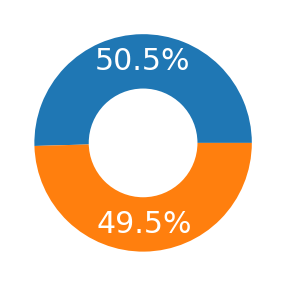

In [17]:
# pie chart

vc=labels.value_counts()

plt.figure(figsize=(5,5))

patches, texts, autotexts=plt.pie(vc,labels=None,shadow=False,autopct='%1.1f%%',pctdistance=0.75) # startangle=90)
centre_circle = plt.Circle((0,0),0.50,fc='white')
plt.gcf()
plt.gca().add_artist(centre_circle)
for text in texts:
    text.set_size(26)
for text in autotexts:
    text.set_size(30)
for ctext in autotexts:
    ctext.set_color('white')
plt.show()

In [18]:
# drop useless columns

df_enc.drop(columns=['rowid','sex'],axis=1,inplace=True)

In [19]:
# get features

X = df_enc.iloc[:,:11].values



**ML: Logistic regression**

In [20]:
# tuning a logistic regression model through an inverse regularization strength and class weights to find the values that minimize validation error

# Set random seed for reproducibility
np.random.seed(0)

# split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)

# Candidates for the inverse regularization strength
C_candidates = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10,100]

# tuning and fitting
pipe_def = Pipeline([('scaler', StandardScaler()), ('log_reg', LogisticRegression(multi_class='ovr'))])
params_def = {'log_reg__C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10,100]}
cv_def = GridSearchCV(pipe_def, param_grid=params_def, cv=5, return_train_score=True)
cv_def.fit(X_train, y_train)
err_train_def = cv_def.cv_results_['mean_train_score']
err_val_def = cv_def.cv_results_['mean_test_score']
best_model_def = cv_def.best_estimator_

# Print training and validation errors
print(f"Training error: {err_train_def}")
print(f"Validation error: {err_val_def}")
print(f"Best model: {best_model_def}")

Training error: [0.5037603  0.58169457 0.79224466 0.89473824 0.9172956  0.9295066
 0.93045    0.92951103]
Validation error: [0.50377358 0.57162823 0.78937806 0.88350804 0.90607966 0.90978337
 0.90607966 0.90607966]
Best model: Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg', LogisticRegression(C=1, multi_class='ovr'))])


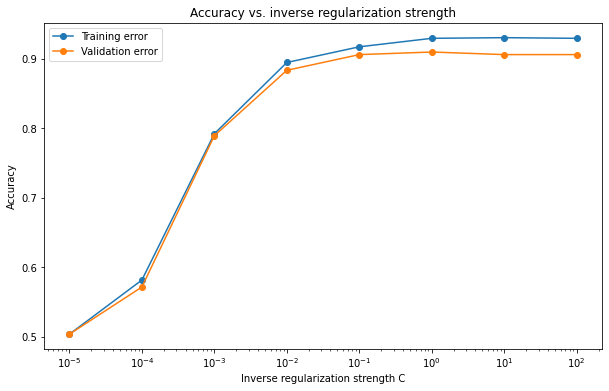

In [21]:
# Plot training and validation errors for the different values of C to better visualize

plt.figure(figsize=(10,6))
plt.plot(C_candidates, err_train_def, '-o', label='Training error')
plt.plot(C_candidates, err_val_def, '-o',label='Validation error')

plt.xscale('log')
plt.title("Accuracy vs. inverse regularization strength")
plt.xlabel('Inverse regularization strength C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
# build a model using optimized hyperparameters 

# Set random seed for reproducibility
np.random.seed(0)

# standartization, fitting and estimation of the errors
scaler = StandardScaler()
log_reg = LogisticRegression(C=1, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='ovr', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False)
pipe_def_model = Pipeline([('scaler', scaler), ('log_reg', log_reg)])
pipe_def_model.fit(X_train, y_train)
err_train_def_model = pipe_def_model.score(X_train, y_train)
err_val_def_model = pipe_def_model.score(X_val, y_val)
y_pred_def_model = pipe_def_model.predict(X)
accuracy_def_model = pipe_def_model.score(X, y)

# printing
print(f"Accuracy of classification: {round(100*accuracy_def_model, 2)}%")
print(f"Training error: {err_train_def_model}")
print(f"Validation error: {err_val_def_model}")

Accuracy of classification: 92.79%
Training error: 0.9323308270676691
Validation error: 0.9104477611940298


/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


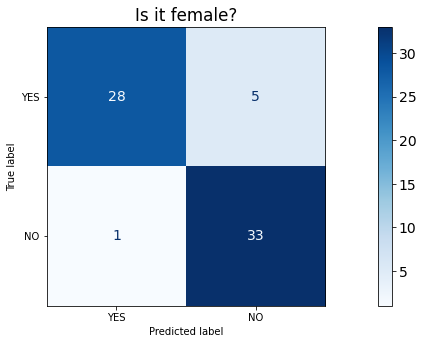

In [23]:
from sklearn.metrics import plot_confusion_matrix

# Define class labels for confusion matrices
classes = ['YES','NO']

# Define plotting options (title, normalization, axes index)
options = [("Is it female?", None, 0)]

# Plot confusion matrices
fig, axes = plt.subplots(1, 1, figsize=(15, 5))  # Create subplots (1 row, 2 columns)
plt.rc('font', size=14)  # Set fontsize
for title, normalize, ax_idx in options:
    # main parameters of function `plot_confusion_matrix` are:
    # trained classifier (log_reg), data (X, y)
    disp = plot_confusion_matrix(pipe_def_model, X_val, y_val,
                                 display_labels=classes,
                                 cmap=plt.cm.Blues,
                                 values_format='.0f', 
                                 normalize=None, ax=axes)
    disp.ax_.set_title(title)
fig.tight_layout()
#plt.savefig("conf_matrix",bbox_inches='tight')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


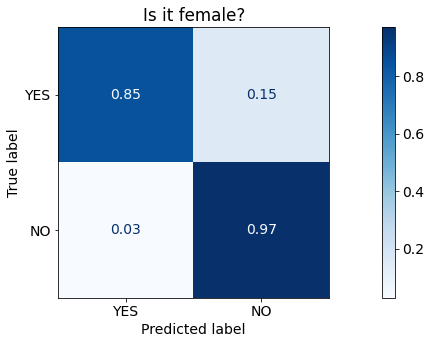

In [24]:
# Define class labels for confusion matrices
classes = ['YES','NO']

# Define plotting options (title, normalization, axes index)
options = [("Is it female?", 'true', 1)]

# Plot confusion matrices
fig, axes = plt.subplots(1, 1, figsize=(15, 5))  # Create subplots (1 row, 2 columns)
plt.rc('font', size=14)  # Set fontsize
for title, normalize, ax_idx in options:
    # main parameters of function `plot_confusion_matrix` are:
    # trained classifier (log_reg), data (X, y)
    disp = plot_confusion_matrix(pipe_def_model, X_val, y_val,
                                 display_labels=classes,
                                 cmap=plt.cm.Blues,
                                 values_format='.2f', 
                                 normalize=normalize, ax=axes)
    disp.ax_.set_title(title)
fig.tight_layout()
plt.savefig("norm_confus_matrix",bbox_inches='tight')
plt.show()

In [25]:
# table view

predicted_def_model = pipe_def_model.predict(X_val)
cm_def_model=confusion_matrix(y_val, predicted_def_model)
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_val,predicted_def_model,labels=[0,1]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

matrix = classification_report(y_val,predicted_def_model,labels=[0,1])
print('Classification report : \n',matrix)

Outcome values : 
 28 5 1 33
Classification report : 
               precision    recall  f1-score   support

           0       0.97      0.85      0.90        33
           1       0.87      0.97      0.92        34

    accuracy                           0.91        67
   macro avg       0.92      0.91      0.91        67
weighted avg       0.92      0.91      0.91        67



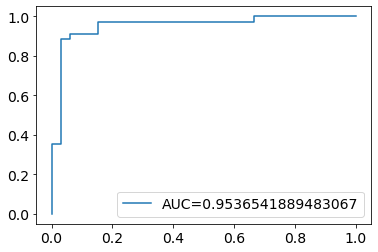

In [26]:
# ROC

y_pred_proba = pipe_def_model.predict_proba(X_val)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_val,  y_pred_proba)
auc = metrics.roc_auc_score(y_val, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()